<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Обучаем-дерево." data-toc-modified-id="Обучаем-дерево.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Обучаем дерево.</a></span></li><li><span><a href="#Обучаем-случайный-лес." data-toc-modified-id="Обучаем-случайный-лес.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Обучаем случайный лес.</a></span></li><li><span><a href="#Обучаем-логистическую-регрессию." data-toc-modified-id="Обучаем-логистическую-регрессию.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Обучаем логистическую регрессию.</a></span></li><li><span><a href="#Борьба-с-дисбалансом." data-toc-modified-id="Борьба-с-дисбалансом.-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Борьба с дисбалансом.</a></span></li><li><span><a href="#Тестирование." data-toc-modified-id="Тестирование.-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Тестирование.</a></span></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

In [209]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


Целевой признак:
- Exited — факт ухода клиента  
  
Признаки:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Взглянем на данные в целом.

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Есть пропуски в Tenure. Так же есть поля типа object. Это Фамилия, страна и пол. Посмотрим на эти поля внимательнее.

In [211]:
data['Surname']. value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

2932 уникальных и множество повторов с общим количеством повторов для каждого уникального не превышаеющее 32-х. Картина вполне ожидаемая. Есть частые фамилии есть редкие. Если мы не исследуем задачу влияния какой-то предвзятости сотрудников банка и предполагаем, что фамилии случайны, то этот столбец нам бесполезен. Просто удалим его.

In [212]:
data['Geography']. value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [213]:
data['Gender']. value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Значений не много. Закодируем их методом OHE.

Теперь подумаем что делать со столбцом Tenure. Для этого посмотрим на дисбаланс в пропущеных значениях и не пропущеных. посмотрим на средние. Взглянем на кореляции этого столбца с остальными.

In [214]:
mlist = {'All':data['Exited'].describe(),
         'isna':data[data['Tenure'].isna()]['Exited'].describe(), 
         'notisna':data[~data['Tenure'].isna()]['Exited'].describe()}
pd.DataFrame(mlist)

,All,isna,notisna
count,10000.000000,909.000000,9091.000000
mean,0.203700,0.201320,0.203938
std,0.402769,0.401207,0.402946
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [215]:
data['Tenure'].describe(). reset_index()

,index,Tenure
0,count,9091.000000
1,mean,4.997690
2,std,2.894723
3,min,0.000000
4,25%,2.000000
5,50%,5.000000
6,75%,7.000000
7,max,10.000000


В пропущеных дисбаланс слегка больше, но можно сказать что пропущеные в этом смысле не влияют на результат.

In [216]:
data.corr()['Tenure']. reset_index()

,index,Tenure
0,RowNumber,-0.007322
1,CustomerId,-0.021418
2,CreditScore,-0.000062
3,Age,-0.013134
4,Tenure,1.000000
5,Balance,-0.007911
6,NumOfProducts,0.011979
7,HasCrCard,0.027232
8,IsActiveMember,-0.032178
9,EstimatedSalary,0.010520


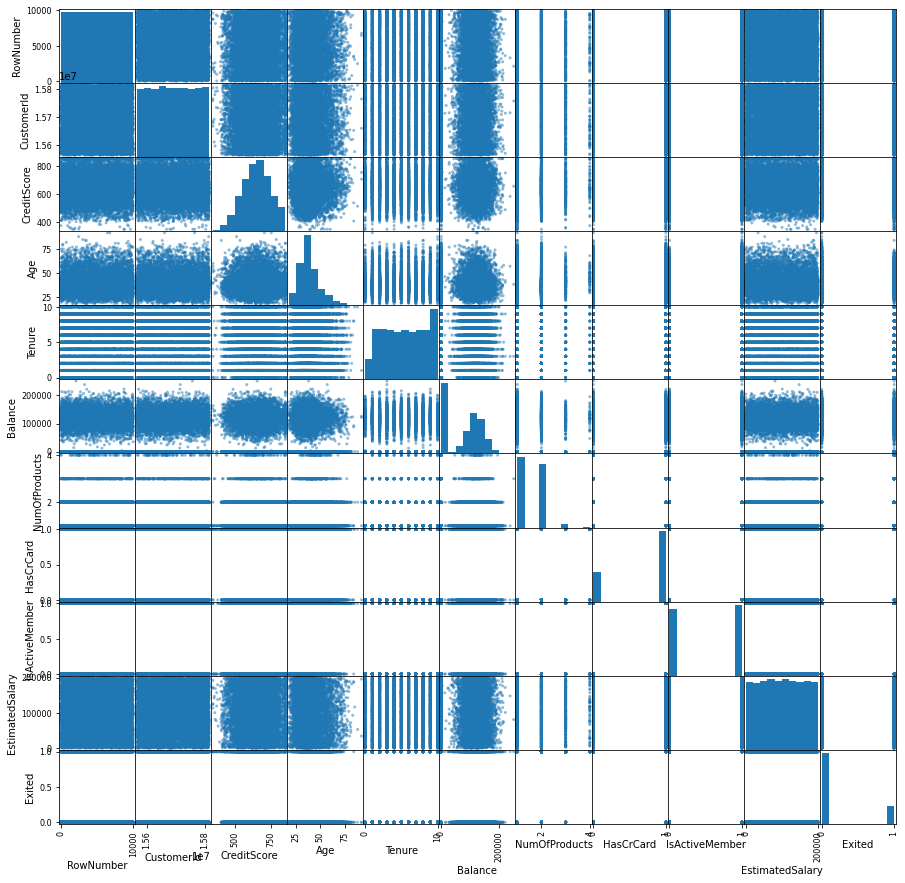

In [217]:
pd.plotting.scatter_matrix(data, figsize = (15,15));
plt.show()

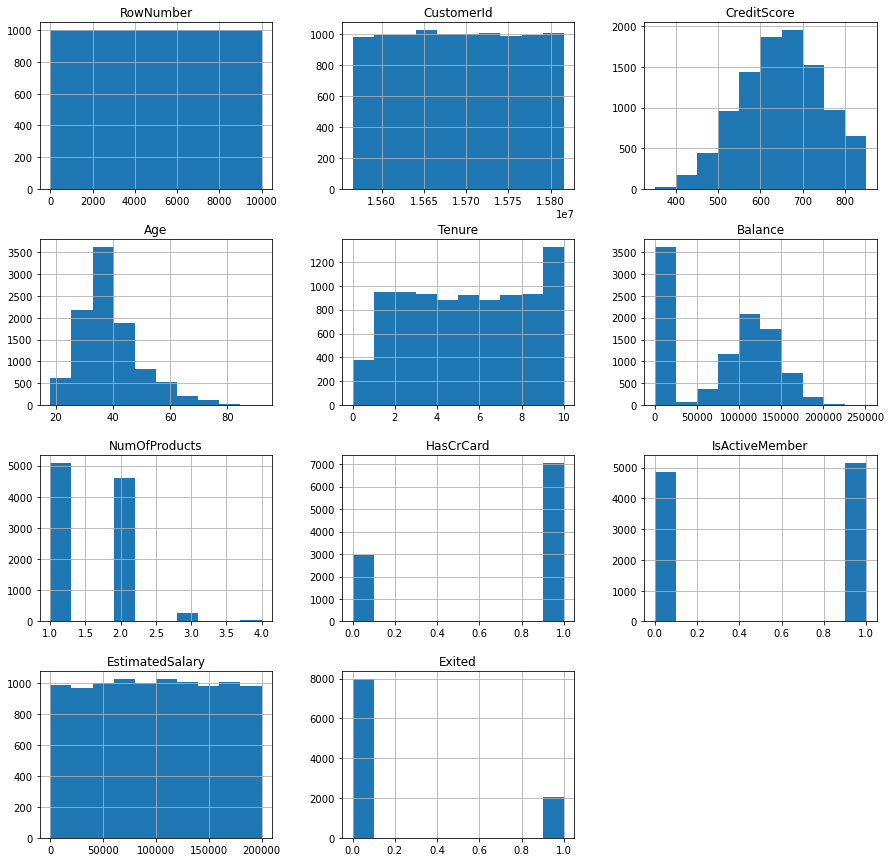

In [218]:
data.hist(figsize=(15,15));

Никаких кореляций, странностей или чего то ещё не вижу. Данные кажутся абсолютно равномерно распределенными относительно остальных столбцов. По идее можно было бы заполнить средним. Но любое создание отсутствующих данных это фантазия аналитика. Можно было бы пообучать модель для заполнения этих пропусков, но пока тупо удалим.

In [219]:
data = data.dropna()
data = data.drop(['Surname'], axis=1)
data. reset_index()
data. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   CreditScore      9091 non-null   int64  
 3   Geography        9091 non-null   object 
 4   Gender           9091 non-null   object 
 5   Age              9091 non-null   int64  
 6   Tenure           9091 non-null   float64
 7   Balance          9091 non-null   float64
 8   NumOfProducts    9091 non-null   int64  
 9   HasCrCard        9091 non-null   int64  
 10  IsActiveMember   9091 non-null   int64  
 11  EstimatedSalary  9091 non-null   float64
 12  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 994.3+ KB


In [220]:
data = pd.concat(
    [data,pd.get_dummies(data[['Geography','Gender']], drop_first=True)], axis=1, join='inner')
data = data.drop(['Geography','Gender'], axis=1)
data.head(3)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          9091 non-null   int64  
 1   CustomerId         9091 non-null   int64  
 2   CreditScore        9091 non-null   int64  
 3   Age                9091 non-null   int64  
 4   Tenure             9091 non-null   float64
 5   Balance            9091 non-null   float64
 6   NumOfProducts      9091 non-null   int64  
 7   HasCrCard          9091 non-null   int64  
 8   IsActiveMember     9091 non-null   int64  
 9   EstimatedSalary    9091 non-null   float64
 10  Exited             9091 non-null   int64  
 11  Geography_Germany  9091 non-null   uint8  
 12  Geography_Spain    9091 non-null   uint8  
 13  Gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(8), uint8(3)
memory usage: 1.1 MB


In [222]:
data = data.drop(['RowNumber','CustomerId'], axis=1)

In [223]:
data. describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938,0.252227,0.247278,0.547135
std,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946,0.434315,0.431453,0.497801
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000,0.000000,0.000000,1.000000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


## Исследование задачи

~~Баланс классов.~~

In [224]:
data['Exited'].mean()*100

20.393796062039378

Ушло чуть больше 20-ти % клиентов. Сначала обучимся в таком виде.

## Борьба с дисбалансом

## Тестирование модели

## Исследование задачи

In [270]:
# разделяем выборку на целевой и не целевые
priznak = data.drop(['Exited'], axis=1)
target = data['Exited']

In [271]:
# отбираем тестовую выборку
priznak_teach, priznak_test, target_teach, target_test = train_test_split(
    priznak, target, test_size=0.1, random_state=12345, stratify = target)

# отбираем обучающую и валидационную выборки
priznak_teach, priznak_valid, target_teach, target_valid = train_test_split(
    priznak_teach, target_teach, test_size=0.28, random_state=12345, stratify = target_teach)

In [272]:
data['Exited'].mean()

0.2039379606203938

In [273]:
target_teach.mean()

0.2039049235993209

In [274]:
target_valid.mean()

0.20384111741597555

In [275]:
target_test.mean()

0.2043956043956044

In [276]:
print(priznak_teach. shape)
print(priznak_valid. shape)
print(priznak_test. shape)
print((priznak_teach+priznak_valid+priznak_test). shape)

(5890, 11)
(2291, 11)
(910, 11)
(9091, 11)


### Обучаем дерево.

In [277]:
Tree_model =  DecisionTreeClassifier(random_state=12345)
Tree_model.fit(priznak_teach, target_teach)
prognos_valid = Tree_model.predict(priznak_valid)

In [278]:
acT = accuracy_score(target_valid, prognos_valid)
f1T = f1_score(target_valid, prognos_valid)
arT = roc_auc_score(target_valid, prognos_valid)
print('accuracy_score = ',acT)
print('f1_score = ',f1T)
print('roc_auc_score = ',arT)

accuracy_score =  0.7931034482758621
f1_score =  0.5072765072765072
roc_auc_score =  0.6924371454600098


### Обучаем случайный лес.

In [279]:
Forest_model =  RandomForestClassifier(random_state=12345)
Forest_model.fit(priznak_teach, target_teach)
prognos_valid = Forest_model.predict(priznak_valid)

In [280]:
acF = accuracy_score(target_valid, prognos_valid)
f1F = f1_score(target_valid, prognos_valid)
arF = roc_auc_score(target_valid, prognos_valid)
print('accuracy_score = ',acF)
print('f1_score = ',f1F)
print('roc_auc_score = ',arF)

accuracy_score =  0.8607594936708861
f1_score =  0.5830065359477125
roc_auc_score =  0.7181988194522709


### Обучаем логистическую регрессию.

In [281]:
Logistic_model =  LogisticRegression(random_state=12345)
Logistic_model.fit(priznak_teach, target_teach)
prognos_valid = Logistic_model.predict(priznak_valid)

In [282]:
acL = accuracy_score(target_valid, prognos_valid)
f1L = f1_score(target_valid, prognos_valid)
arL = roc_auc_score(target_valid, prognos_valid)
print('accuracy_score = ',acL)
print('f1_score = ',f1L)
print('roc_auc_score = ',arL)

accuracy_score =  0.7896115233522479
f1_score =  0.10740740740740741
roc_auc_score =  0.51898784702656


Ни одна из моделей не показала хороших показателей.  
Если качество ещё более менее, а AUC-ROC с натяжкой можно счесть удовлетворительным, то f1 мера вообще даже 60% не набирает.  
Тем не менее случайный лес показывает себя заметно лучше остальных моделей по всем метрикам.  
Попробуем сбалансировать выборку.

### Борьба с дисбалансом.

Сначала попробуем стандартные методы.

In [283]:
Tree_model =  DecisionTreeClassifier(random_state=12345, class_weight = 'balanced')
Tree_model.fit(priznak_teach, target_teach)
prognos_valid = Tree_model.predict(priznak_valid)

In [284]:
acT = accuracy_score(target_valid, prognos_valid)
f1T = f1_score(target_valid, prognos_valid)
arT = roc_auc_score(target_valid, prognos_valid)
print('accuracy_score = ',acT)
print('f1_score = ',f1T)
print('roc_auc_score = ',arT)

accuracy_score =  0.7983413356612833
f1_score =  0.5157232704402517
roc_auc_score =  0.6973197011533115


In [285]:
Forest_model =  RandomForestClassifier(random_state=12345, class_weight = 'balanced')
Forest_model.fit(priznak_teach, target_teach)
prognos_valid = Forest_model.predict(priznak_valid)

In [286]:
acF = accuracy_score(target_valid, prognos_valid)
f1F = f1_score(target_valid, prognos_valid)
arF = roc_auc_score(target_valid, prognos_valid)
print('accuracy_score = ',acF)
print('f1_score = ',f1F)
print('roc_auc_score = ',arF)

accuracy_score =  0.8625054561326931
f1_score =  0.5860709592641262
roc_auc_score =  0.7192953106803411


In [287]:
Logistic_model =  LogisticRegression(random_state=12345, class_weight = 'balanced')
Logistic_model.fit(priznak_teach, target_teach)
prognos_valid = Logistic_model.predict(priznak_valid)

In [288]:
acL = accuracy_score(target_valid, prognos_valid)
f1L = f1_score(target_valid, prognos_valid)
arL = roc_auc_score(target_valid, prognos_valid)
print('accuracy_score = ',acL)
print('f1_score = ',f1L)
print('roc_auc_score = ',arL)

accuracy_score =  0.6595373199476211
f1_score =  0.4444444444444444
roc_auc_score =  0.662720354821744


Дерево и лес даже ухудшились, но оччень незначительно. Логистика улучшилась заметно но как была хуже всех так и осталась. Лидер по прежнему лес. Попробуем сбалансировать при помощи upsampling.

Делим датасет на нули и единицы по целевому.

In [289]:
priznak_zeros = priznak_teach[target_teach == 0]
priznak_ones = priznak_teach[target_teach == 1]
target_zeros = target_teach[target_teach == 0]
target_ones = target_teach[target_teach == 1]
print(priznak_zeros.shape)
print(priznak_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)
print(target_ones.shape[0]/(target_ones.shape[0]+target_zeros.shape[0]))
print(priznak_ones.shape[0]/(priznak_ones.shape[0]+priznak_zeros.shape[0]))

(4689, 11)
(1201, 11)
(4689,)
(1201,)
0.2039049235993209
0.2039049235993209


Увеличиваем количество единиц так, что бы количество единиц и нулей примерно было равно.

In [290]:
repeat = 4
new_priznak = pd.concat([priznak_zeros] + [priznak_ones] * repeat)
new_target = pd.concat([target_zeros] + [target_ones] * repeat)
new_target.mean()

0.5060570947013588

Перемешаем

In [291]:
new_priznak, new_target = shuffle(new_priznak, new_target, random_state=12345)

Снова обучимся.

In [292]:
Tree_model =  DecisionTreeClassifier(random_state=12345)
Tree_model.fit(new_priznak, new_target)
prognos_valid = Tree_model.predict(priznak_valid)

In [293]:
acT = accuracy_score(target_valid, prognos_valid)
f1T = f1_score(target_valid, prognos_valid)
arT = roc_auc_score(target_valid, prognos_valid)
print('accuracy_score = ',acT)
print('f1_score = ',f1T)
print('roc_auc_score = ',arT)

accuracy_score =  0.8088171104321257
f1_score =  0.5360169491525424
roc_auc_score =  0.709474435553552


In [294]:
Forest_model =  RandomForestClassifier(random_state=12345)
Forest_model.fit(new_priznak, new_target)
prognos_valid = Forest_model.predict(priznak_valid)

In [295]:
acF = accuracy_score(target_valid, prognos_valid)
f1F = f1_score(target_valid, prognos_valid)
arF = roc_auc_score(target_valid, prognos_valid)
print('accuracy_score = ',acF)
print('f1_score = ',f1F)
print('roc_auc_score = ',arF)

accuracy_score =  0.8511567001309471
f1_score =  0.6039488966318235
roc_auc_score =  0.7416401348660732


In [296]:
Logistic_model =  LogisticRegression(random_state=12345)
Logistic_model.fit(new_priznak, new_target)
prognos_valid = Logistic_model.predict(priznak_valid)

In [297]:
acL = accuracy_score(target_valid, prognos_valid)
f1L = f1_score(target_valid, prognos_valid)
arL = roc_auc_score(target_valid, prognos_valid)
print('accuracy_score = ',acL)
print('f1_score = ',f1L)
print('roc_auc_score = ',arL)

accuracy_score =  0.6529899607158446
f1_score =  0.44288717589348287
roc_auc_score =  0.6617946767346631


Логистика почти не изменилась. Дерево немного улучшилось. Лес тоже, но вот его площадь почему то уменьшилась. И вот что с этим делать? Ну целевая метрика f1, поэтому будем считать что стало лучше...  

Выбираем с текущим балансом дерево. Подберем для него max_depth и n_estimators.

Эта ячейка закоментирована для того, что бы не пришлось ждать долго. 

In [298]:
class weather2():
    '''storyes = pd.DataFrame(columns = [ 'Depth', 'Est', 'Accuracy', 'F1', 'AUC-ROC' ])
    max_f1 = 0
    best_d = 0
    best_est = 0
    for depth in range(3,18):
        for est in range(2,38):
            Forest_model =  RandomForestClassifier(random_state=12345, max_depth = depth, n_estimators=est)
            Forest_model.fit(new_priznak, new_target)
            prognos_valid = Forest_model.predict(priznak_valid)
            ac = accuracy_score(target_valid, prognos_valid)
            f1 = f1_score(target_valid, prognos_valid)
            ar = roc_auc_score(target_valid, prognos_valid)
            storyes.loc[len(storyes.index)] = [depth,est,ac, f1, ar]
            if f1>max_f1:
                best_d = depth
                best_est = est
                max_f1 = f1
    Forest_model =  RandomForestClassifier(random_state=12345, max_depth = best_d, n_estimators=best_est)
    Forest_model.fit(new_priznak, new_target)
    prognos_valid = Forest_model.predict(priznak_valid)
    print('Best max_depth=', best_d)
    print('Best n_estimators=', best_est)
    print('Best F1=',f1_score(target_valid, prognos_valid))
    print('Best accuracy=',accuracy_score(target_valid, prognos_valid))
    print('Best roc_auc_score=',roc_auc_score(target_valid, prognos_valid))'''

Best max_depth= 13
Best n_estimators= 33
Best F1= 0.6282722513089006
Best accuracy= 0.8450458315146224
Best roc_auc_score= 0.7696640557496525


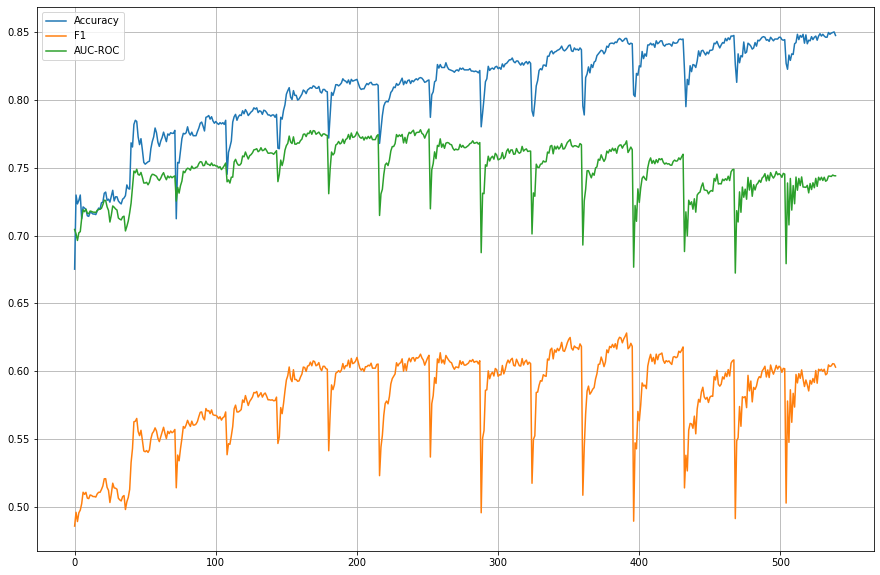

In [299]:
storyes[['Accuracy', 'F1', 'AUC-ROC']].plot(figsize=(15,10), grid = True);

Из графика видно, что все показатели вышли на плато. Дальнейшее увелличение этих параметров вряд ли имеет смысл.  
max_depth = 13  
n_estimators = 33

### Тестирование.

Обучаем модель с нужными параметрами и обучаем на сбалансированной выборке и делаем прогноз для тестовой выборки.

In [300]:
Forest_model =  RandomForestClassifier(random_state=12345, max_depth = 13, n_estimators=33)
Forest_model.fit(new_priznak, new_target)
prognos_test = Forest_model.predict(priznak_test)

Смотрим результаты.

In [301]:
print('Test F1=',f1_score(target_test, prognos_test))
print('Test accuracy=',accuracy_score(target_test, prognos_test))
print('Test roc_auc_score=',roc_auc_score(target_test, prognos_test))

Test F1= 0.6091644204851753
Test accuracy= 0.8406593406593407
Test roc_auc_score= 0.7540396839541377


Показатели немного пониже, но очень близки к показателям на валидационной выборке. Модель адекватная. Ура)